# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm


This plots the function:

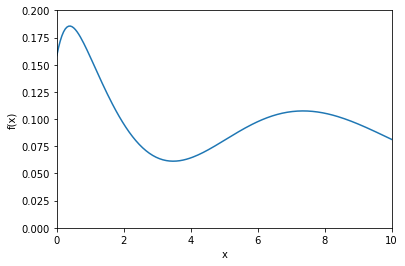

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [4]:
def genSample(npts):
    sample = []
    # YOUR CODE HERE
    m=1.9
    x=numpy.random.uniform(0,10,10**6)
    for i in range(len(x)):
        r=random.random()
        if len(sample)<npts:
            if r<(f(x[i])/m):
                sample.append(x[i])
    return numpy.array(sample)

In [5]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


(array([0.1775, 0.1755, 0.187 , 0.18  , 0.1635, 0.144 , 0.142 , 0.1255,
        0.118 , 0.0965, 0.0835, 0.0795, 0.074 , 0.0665, 0.0615, 0.059 ,
        0.052 , 0.065 , 0.0655, 0.0645, 0.065 , 0.0735, 0.0795, 0.062 ,
        0.0805, 0.086 , 0.0885, 0.09  , 0.0995, 0.0925, 0.0885, 0.108 ,
        0.0975, 0.1135, 0.095 , 0.0995, 0.1155, 0.106 , 0.1145, 0.106 ,
        0.113 , 0.104 , 0.1015, 0.1115, 0.084 , 0.093 , 0.087 , 0.089 ,
        0.0835, 0.092 , 0.    , 0.    , 0.    , 0.    ]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8]),
 <a list of 54 Patch objects>)

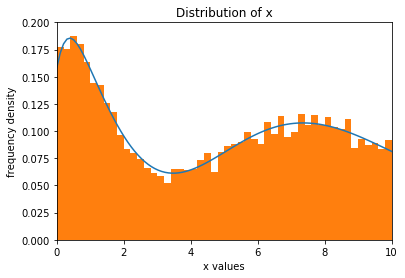

In [10]:
a=genSample(10**4)

y=numpy.zeros(10**4)
for i in range(len(a)):
    y[i]=f(a[i])

xs = numpy.linspace(0, 10, 100)
fs = f(xs)
plt.plot(xs, fs)
plt.ylabel('frequency density')
plt.xlabel('x values')
plt.xlim(0,10)
plt.ylim(0,0.2)
plt.title('Distribution of x')
z=numpy.arange(0,11,0.2)
plt.hist(a, bins=z,density=True)